# Segmenting and Clustering in Toronto

In [1]:
import pandas as pd
import numpy as np

## Part 1
Read the Toronto neighborhood/postal data into a pandas datafrom

In [2]:
table_TOR = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

Just take the first table from the page.

In [3]:
df_TOR=table_TOR[0]

In [4]:
df_TOR.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Remove any rows with "Not assigned" boroughs

In [5]:
df_TOR.drop(df_TOR[df_TOR['Borough']=='Not assigned'].index,inplace=True)

In [6]:
df_TOR.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [7]:
df_TOR.reset_index(drop=True,inplace=True)
df_TOR

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


No further cleaning necessary.

Give the dimensions of the dataframe.

In [8]:
df_TOR.shape

(103, 3)

------- End of Part 1 --------------

## Part 2

Find latitude and longitude coordinates for each postal code.

In [9]:
#!conda install -c conda-forge geopy --yes

In [10]:
#postal_code='M3A'

In [11]:
#import geocoder # import geocoder

# initialize your variable to None
#lat_lng_coords = None

# loop until you get the coordinates
#while(lat_lng_coords is None):
#  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
#  lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]


The geocoder did not seem to work (timed-out each call)

Instead, read data from csv file.

In [12]:
table_latlon=pd.read_csv('Geospatial_Coordinates.csv')

In [13]:
table_latlon

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Merge the postal/borough frame with the latitude/longitude frame.

In [14]:
df_TOR=df_TOR.merge(table_latlon,left_on='Postal Code',right_on='Postal Code')
df_TOR

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


------- End of Part 2 --------------

## Part 3

Analyze regions of Toronto based on their Postal Codes.

Note: We are using the Postal Codes to distinguish the regions, as they are the distinct entities in this data set.  The Postal Codes may include more than one "neighborhood".

First we will use folium to show the postal code regions on a map of Toronto.

In [15]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [16]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [17]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


In [18]:
# create map of Toronto using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=10)
map_tor

![screenshot](p18.png)

In [19]:
# add markers to map
for lat, lng, borough, postcode in zip(df_TOR['Latitude'], df_TOR['Longitude'], df_TOR['Borough'], df_TOR['Postal Code']):
    label = '{}, {}'.format(postcode, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

![screenshot](p19.png)

### Limit the analysis

We will focus on only the various Postal Codes in Downtown Toronto.

In [20]:
df_down=df_TOR[df_TOR['Borough']=='Downtown Toronto'].reset_index(drop=True)

This leaves us with 19 Postal Code regions.

In [21]:
df_down

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


Now redo the map with only our "Downtown Toronto" regions

In [22]:
# create map of Downtown Toronto using latitude and longitude values
map_downtor = folium.Map(location=[latitude, longitude], zoom_start=13)


and show these 19 regions with the 500m radii to be used for venue searches.

In [23]:
# add markers to map
# Show the 500m radius to be used for venue searches

for lat, lng, borough, postcode in zip(df_down['Latitude'], df_down['Longitude'], df_down['Borough'], df_down['Postal Code']):
    label = '{}, {}'.format(postcode, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtor)  
    folium.Circle([lat, lng],
                    radius=500
                   ).add_to(map_downtor)
    
map_downtor

![screenshot](p23.png)

### Call Foursquare API for venues


Prepare for the call.

In [24]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [25]:
CLIENT_ID = 'YZBWPF2BJDGV1XV00FX4WE4U5EST0FTAWI3C14QIRDTM4X3Q' # your Foursquare ID
CLIENT_SECRET = 'JWOBH04PBMQX5AX0NHPCPSFCWHHCUGQZGORYKOS04HVEK0TO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YZBWPF2BJDGV1XV00FX4WE4U5EST0FTAWI3C14QIRDTM4X3Q
CLIENT_SECRET:JWOBH04PBMQX5AX0NHPCPSFCWHHCUGQZGORYKOS04HVEK0TO


In [26]:
df_down.loc[0, 'Postal Code']

'M5A'

In [27]:
pc_latitude = df_down.loc[0, 'Latitude'] # postal code latitude value
pc_longitude = df_down.loc[0, 'Longitude'] # postal code longitude value

pc_name = df_down.loc[0, 'Postal Code'] + '-' + df_down.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(pc_name, 
                                                               pc_latitude, 
                                                               pc_longitude))

Latitude and longitude values of M5A-Downtown Toronto are 43.6542599, -79.3606359.


In [28]:
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    pc_latitude, 
    pc_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YZBWPF2BJDGV1XV00FX4WE4U5EST0FTAWI3C14QIRDTM4X3Q&client_secret=JWOBH04PBMQX5AX0NHPCPSFCWHHCUGQZGORYKOS04HVEK0TO&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

Make the call and get the results for Toronto in general.

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '601607cd96e57366955014d6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b8466a498e83df908c3f21',
       'name': 'Tandem Coffee',
       'location': {'address': '368 King St E',
        'crossStreet': 'at Trinity St',
        'lat': 43.65355870959944,
        'lng': -79.36180945913513,
        'labeledLatLngs': [{'label': 'display',
 

Organize the results.

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tandem Coffee,Coffee Shop,43.653559,-79.361809
1,Roselle Desserts,Bakery,43.653447,-79.362017
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Impact Kitchen,Restaurant,43.656369,-79.356980


In [32]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


Now create a function to get venues near each Postal Code.

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call for the results around each Postal Code center.

In [34]:
downtor_venues = getNearbyVenues(names=df_down['Postal Code'],
                                   latitudes=df_down['Latitude'],
                                   longitudes=df_down['Longitude']
                                  )

M5A
M7A
M5B
M5C
M5E
M5G
M6G
M5H
M5J
M5K
M5L
M5S
M5T
M5V
M4W
M5W
M4X
M5X
M4Y


In [35]:
print(downtor_venues.shape)

(1225, 7)


### Clean and Organize the results

Find out how many categories of venues were found.

In [36]:
print('There are {} uniques categories.'.format(len(downtor_venues['Venue Category'].unique())))

There are 209 uniques categories.


Do a one-hot encoding to organize the venues by Postal Code in terms of category.

In [37]:
# one hot encoding
downtor_onehot = pd.get_dummies(downtor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtor_onehot['Postal Code'] = downtor_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [downtor_onehot.columns[-1]] + list(downtor_onehot.columns[:-1])
downtor_onehot = downtor_onehot[fixed_columns]

downtor_onehot.head()

,Postal Code,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
downtor_onehot.shape

(1225, 210)

Group by Postal Code and and find the frequency of each category in each Postal Code.

In [39]:
downtor_grouped = downtor_onehot.groupby('Postal Code').mean().reset_index()
downtor_grouped

,Postal Code,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,M4W,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.0000,0.25,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,M4X,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,M4Y,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.012500,0.000000,0.00,...,0.0125,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000
3,M5A,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.021739,0.00,...,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.021739
4,M5B,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.0000,0.00,0.00,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000
5,M5C,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.037500,0.000000,0.00,...,0.0000,0.00,0.00,0.012500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000
6,M5E,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.0000,0.00,0.00,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,M5G,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.00,...,0.0000,0.00,0.00,0.016393,0.000000,0.016393,0.000000,0.016393,0.000000,0.016393
8,M5H,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.020833,0.000000,0.00,...,0.0000,0.00,0.00,0.010417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,M5J,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,0.05,...,0.0000,0.00,0.01,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000


In [40]:
downtor_grouped.shape

(19, 210)

Take a look at the top 5 venues in each Postal Code.

In [41]:
num_top_venues = 5

for pc in downtor_grouped['Postal Code']:
    print("----"+pc+"----")
    temp = downtor_grouped[downtor_grouped['Postal Code'] == pc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M4W----
          venue  freq
0          Park  0.50
1    Playground  0.25
2         Trail  0.25
3       Airport  0.00
4  Neighborhood  0.00


----M4X----
         venue  freq
0         Café  0.07
1  Coffee Shop  0.07
2         Park  0.04
3          Pub  0.04
4       Bakery  0.04


----M4Y----
                  venue  freq
0           Coffee Shop  0.09
1      Sushi Restaurant  0.06
2   Japanese Restaurant  0.06
3            Restaurant  0.04
4  Fast Food Restaurant  0.04


----M5A----
            venue  freq
0     Coffee Shop  0.17
1            Park  0.07
2          Bakery  0.07
3             Pub  0.07
4  Breakfast Spot  0.04


----M5B----
             venue  freq
0   Clothing Store  0.09
1      Coffee Shop  0.08
2   Cosmetics Shop  0.03
3  Bubble Tea Shop  0.03
4            Hotel  0.03


----M5C----
                 venue  freq
0                 Café  0.06
1          Coffee Shop  0.06
2         Cocktail Bar  0.04
3  American Restaurant  0.04
4                Hotel  0.04


----M5E---

Now we will find the 10 most common venues in each Postal Code.

In [42]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postal Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
pc_venues_sorted = pd.DataFrame(columns=columns)
pc_venues_sorted['Postal Code'] = downtor_grouped['Postal Code']

for ind in np.arange(downtor_grouped.shape[0]):
    pc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtor_grouped.iloc[ind, :], num_top_venues)

pc_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4W,Park,Playground,Trail,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
1,M4X,Café,Coffee Shop,Park,Italian Restaurant,Restaurant,Pub,Bakery,Pizza Place,Chinese Restaurant,Pharmacy
2,M4Y,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Gay Bar,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio
3,M5A,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Cosmetics Shop,Brewery,Restaurant
4,M5B,Clothing Store,Coffee Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Pizza Place


### Clustering

Cluster the Postal Code regions using the venue results.

In [44]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

Do a trial with 7 clusters.

In [45]:
# set number of clusters
kclusters = 7

downtor_grouped_clustering = downtor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([1, 4, 4, 4, 4, 0, 0, 6, 4, 4, 4, 4, 5, 0, 3, 0, 4, 2, 6])

Try a set of different numbers of clusters (K) and use the inertia as error to indicate what might be an optimal clustering.

In [46]:
Ks=11

inertia = np.zeros((Ks-1))

for n in range(1,Ks):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(downtor_grouped_clustering)
    inertia[n-1]=kmeans.inertia_

In [47]:
inertia

array([0.82597273, 0.47242654, 0.35213121, 0.27118709, 0.22244265,
       0.1822127 , 0.15873693, 0.13024234, 0.10906209, 0.08917429])

Plot the error to look for elbows in the graph indicating potential optimal K values.

In [48]:
import matplotlib.pyplot as plt

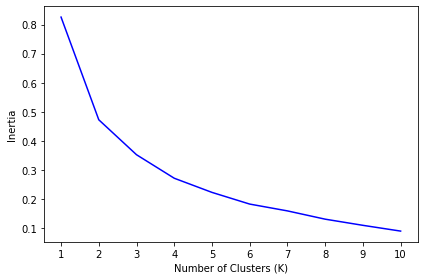

In [49]:
plt.plot(range(1,Ks),inertia,'b')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters (K)')
plt.xticks(range(1,Ks))
plt.tight_layout()
plt.show()

Explore using K=2 as indicated from the first elbow in the graph.

In [50]:
# set number of clusters
kclusters = 2  #from above analysis

downtor_grouped_clustering = downtor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
# add clustering labels
pc_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtor_merged = df_down

# merge downtor_grouped with df_down to add latitude/longitude for each postal code
downtor_merged = downtor_merged.join(pc_venues_sorted.set_index('Postal Code'), on='Postal Code')

downtor_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Cosmetics Shop,Brewery,Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Sushi Restaurant,Yoga Studio,Creperie,Sandwich Place,Burrito Place,Café,Portuguese Restaurant,College Auditorium,College Cafeteria
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Pizza Place
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,American Restaurant,Hotel,Gastropub,Cocktail Bar,Cosmetics Shop,Restaurant,Lingerie Store,Department Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Bakery,Farmers Market,Restaurant,Cheese Shop,Clothing Store,Eastern European Restaurant


Plot Postal Code regions by cluster (indicated by color of marker).

In [52]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtor_merged['Latitude'], downtor_merged['Longitude'], downtor_merged['Postal Code'], downtor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

![screenshot](p53.png)

Identify the sole member of one of the clusters.

In [54]:
downtor_merged.loc[downtor_merged['Cluster Labels'] == 0, downtor_merged.columns[[0] + list(range(5, downtor_merged.shape[1]))]]

,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,M4W,0,Park,Playground,Trail,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


#### Note: 

The plot shows that an elbow occurs at a K=2, indicating an optimal clustering of only 2 clusters.  This seems to indicate that Postal Code M4W is much different than all the other regions.  This does not give a good clustering.

Moving to the elbow at K=4:

Repeat the procedure from above to view the cluster results.

In [55]:
# set number of clusters
kclusters = 4  

downtor_grouped_clustering = downtor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1])

In [56]:
# add new clustering labels
pc_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
pc_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtor_merged = df_down

# merge downtor_grouped with df_down to add latitude/longitude for each postal code
downtor_merged = downtor_merged.join(pc_venues_sorted.set_index('Postal Code'), on='Postal Code')

#downtor_merged.head() 

In [57]:
# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtor_merged['Latitude'], downtor_merged['Longitude'], downtor_merged['Postal Code'], downtor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

![screenshot](p58.png)

#### Note: 

With K=4, we see that Postal Codes M4W, M6G and M5G are distinct from the other regions in more central downtown.  This does not give a good clustering.

Moving to the elbow at K=6:

In [59]:
# set number of clusters
kclusters = 6  

downtor_grouped_clustering = downtor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 4, 1, 0, 1, 1, 3, 5])

In [60]:
# add new clustering labels
pc_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
pc_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtor_merged = df_down

# merge downtor_grouped with df_down to add latitude/longitude for each postal code
downtor_merged = downtor_merged.join(pc_venues_sorted.set_index('Postal Code'), on='Postal Code')

#downtor_merged.head() 

In [61]:
# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtor_merged['Latitude'], downtor_merged['Longitude'], downtor_merged['Postal Code'], downtor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

![screenshot](p62.png)

Find how many in Cluster 1.

In [63]:
km1=kmeans.labels_[kmeans.labels_ == 1]
km1.shape

(13,)

This gives a decent clustering but there is one large cluster with 13 Postal Code regions.

#### Note: 

To get a clearer picture of the disctions among the remaining cluster of 13 postal codes, we try K=8.

Repeat the procedue once more to investigate the clustering with 8 clusters.

In [64]:
# set number of clusters
kclusters = 8  

downtor_grouped_clustering = downtor_grouped.drop('Postal Code', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 1, 1, 0, 1, 1, 1, 6, 7, 7, 7, 7, 5, 1, 4, 1, 7, 3, 6])

In [65]:
# add new clustering labels
pc_venues_sorted.drop('Cluster Labels',axis=1,inplace=True)
pc_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtor_merged = df_down

# merge downtor_grouped with df_down to add latitude/longitude for each postal code
downtor_merged = downtor_merged.join(pc_venues_sorted.set_index('Postal Code'), on='Postal Code')

#downtor_merged.head() 

In [66]:
# Matplotlib and associated plotting modules
#import matplotlib.cm as cm
#import matplotlib.colors as colors

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtor_merged['Latitude'], downtor_merged['Longitude'], downtor_merged['Postal Code'], downtor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

![screenshot](p67.png)

Let's take a look at the resulting clusters one by one.

In [68]:
for c in [0,2,3,4,5,6,7,1]:
    print('\nCluster: ',c)
    df=downtor_merged.loc[downtor_merged['Cluster Labels'] == c, downtor_merged.columns[[0] + list(range(5, downtor_merged.shape[1]))]]
    display(df)


Cluster:  0


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Cosmetics Shop,Brewery,Restaurant



Cluster:  2


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,M4W,2,Park,Playground,Trail,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center



Cluster:  3


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,M6G,3,Grocery Store,Café,Park,Italian Restaurant,Coffee Shop,Nightclub,Restaurant,Baby Store,Candy Store,Deli / Bodega



Cluster:  4


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,M5V,4,Airport Lounge,Airport Terminal,Airport,Bar,Coffee Shop,Plane,Rental Car Location,Sculpture Garden,Boutique,Boat or Ferry



Cluster:  5


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,M5S,5,Café,Bookstore,Bar,Japanese Restaurant,Bakery,Yoga Studio,Italian Restaurant,Beer Bar,Beer Store,Nightclub



Cluster:  6


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M7A,6,Coffee Shop,Sushi Restaurant,Yoga Studio,Creperie,Sandwich Place,Burrito Place,Café,Portuguese Restaurant,College Auditorium,College Cafeteria
5,M5G,6,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Salad Place,Burger Joint,Bubble Tea Shop,Diner,Donut Shop,Bike Rental / Bike Share



Cluster:  7


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,M5H,7,Coffee Shop,Café,Restaurant,Deli / Bodega,Clothing Store,Gym,Hotel,Thai Restaurant,Bakery,Concert Hall
8,M5J,7,Coffee Shop,Aquarium,Café,Hotel,Fried Chicken Joint,Restaurant,Scenic Lookout,Italian Restaurant,Brewery,Plaza
9,M5K,7,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,American Restaurant,Italian Restaurant,Seafood Restaurant,Salad Place,Asian Restaurant
10,M5L,7,Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Italian Restaurant,Deli / Bodega,Cocktail Bar,Seafood Restaurant
17,M5X,7,Coffee Shop,Café,Hotel,Japanese Restaurant,Gym,Restaurant,Seafood Restaurant,Salad Place,Asian Restaurant,Steakhouse



Cluster:  1


,Postal Code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5B,1,Clothing Store,Coffee Shop,Bubble Tea Shop,Middle Eastern Restaurant,Café,Japanese Restaurant,Cosmetics Shop,Hotel,Ramen Restaurant,Pizza Place
3,M5C,1,Café,Coffee Shop,American Restaurant,Hotel,Gastropub,Cocktail Bar,Cosmetics Shop,Restaurant,Lingerie Store,Department Store
4,M5E,1,Coffee Shop,Cocktail Bar,Beer Bar,Seafood Restaurant,Bakery,Farmers Market,Restaurant,Cheese Shop,Clothing Store,Eastern European Restaurant
12,M5T,1,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dessert Shop,Bar,Gaming Cafe,Grocery Store,Farmers Market
15,M5W,1,Coffee Shop,Seafood Restaurant,Café,Restaurant,Beer Bar,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Hotel,Art Gallery
16,M4X,1,Café,Coffee Shop,Park,Italian Restaurant,Restaurant,Pub,Bakery,Pizza Place,Chinese Restaurant,Pharmacy
18,M4Y,1,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Fast Food Restaurant,Restaurant,Gay Bar,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio


## Conclusion

We have chosen to use 8 clusters showing that, among the 19 Postal code regions of Downtoen Toronto, there are 5 which seem to be distinct from each of and all the rest.  There is one cluster of 2 regions and another cluster of 5 regions.  Finally, the largest cluster has 7 regions.

Now we will breakdown each cluster.

### Cluster 0 we will call the Coffee-Park-Pub-combo cluster.

In [69]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 0, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M5A,Downtown Toronto,"Regent Park, Harbourfront"


### Cluster 1 we will call the Large-Variety-But-Lots-of-Coffee-Shops-and-Cafes cluster.

In [70]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 1, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M5B,Downtown Toronto,"Garden District, Ryerson"
M5C,Downtown Toronto,St. James Town
M5E,Downtown Toronto,Berczy Park
M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park"
M5W,Downtown Toronto,Stn A PO Boxes
M4X,Downtown Toronto,"St. James Town, Cabbagetown"
M4Y,Downtown Toronto,Church and Wellesley


### Cluster 2 we will call the Outdoor-Adventure Cluster.

In [71]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 2, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M4W,Downtown Toronto,Rosedale


### Cluster 3 we will call the Groceries-and-Cafe cluster.

In [72]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 3, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M6G,Downtown Toronto,Christie


### Cluster 4 we will call the Airport-Island cluster.

In [73]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 4, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport"


### Cluster 5 we will call the Cafe-for-Readers cluster.

In [74]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 5, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M5S,Downtown Toronto,"University of Toronto, Harbord"


### Cluster 6 we will call the Coffee-and-a-Quick-Bite cluster.

In [75]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 6, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M5G,Downtown Toronto,Central Bay Street


### Cluster 7 we will call the Coffee-and-Out-of-Towners cluster.

In [76]:
df=downtor_merged.loc[downtor_merged['Cluster Labels'] == 7, downtor_merged.columns[0:3]]
df.style.hide_index()

Postal Code,Borough,Neighbourhood
M5H,Downtown Toronto,"Richmond, Adelaide, King"
M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands"
M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange"
M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"
M5X,Downtown Toronto,"First Canadian Place, Underground city"


------- End of Part 3 --------------